In [3]:
from dijkstra import showPath, generatePath, dijkstraFromSrcToRoad
from astar import astarFromSrcWholeBB, astarFromSrcTillDes
from rasterData import *
from helper import findIndex
import numpy as np
from main_raster import  main, PathToRoad

par_dir structure example: 

par_dir: `/MTP`

- `'/MTP/data/merged_file_w_roads.tif'`
- `'/MTP/data/tile_data_water'`
- `'/MTP/data/temp/'`


PathToRoad function: Given a point, generate path to the nearest road

Src: (31.805, 77.0858)
Radius: 30
6 files merged


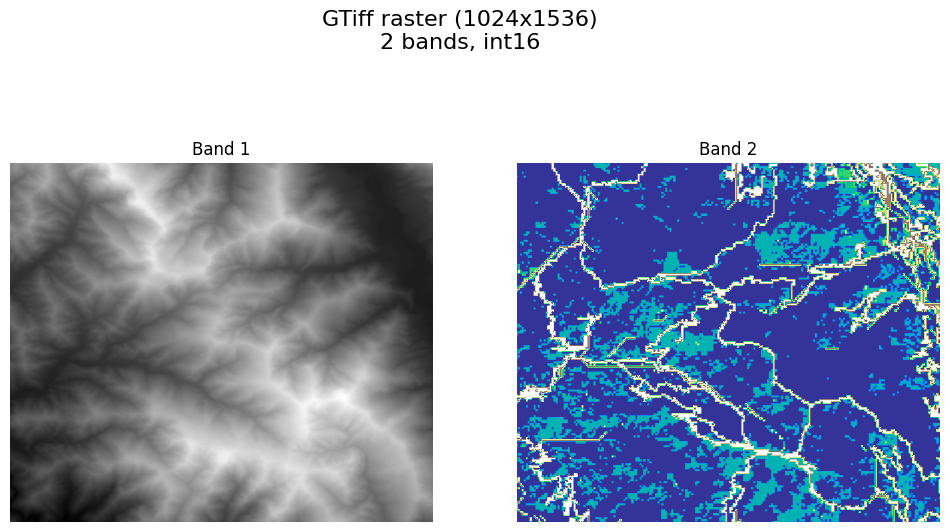

Bounding box: (76.9905789650973, 31.724076717319075, 77.18102103490271, 31.885923282680924)
Elevation Map Info
Gray Map Shape: (601, 707)
Min: 799
Max: 2988
Source Index: (300, 353)
Source Elevation: 2442
Source landcover: 110


In [8]:
    par_dir = "/Users/aakash/Desktop/MTP2/code"
    tile_size = 512
    SPLIT_DATA = False

    alpha = 0
    h_weight = 0.1
    slope = 40
    resolution = 30

    # Run Path to road function
    src_lat, src_lon = 31.805, 77.0858
    path = PathToRoad((src_lat,src_lon), 30, par_dir = par_dir, tile_size=tile_size,SPLIT_DATA=SPLIT_DATA,alpha=alpha,h_weight=h_weight,slope=slope,resolution=resolution, DEBUG=True, SHOW_PLOT=True)

    

Given a bounding box, source and destination point, calculate path between the given points

2 files merged


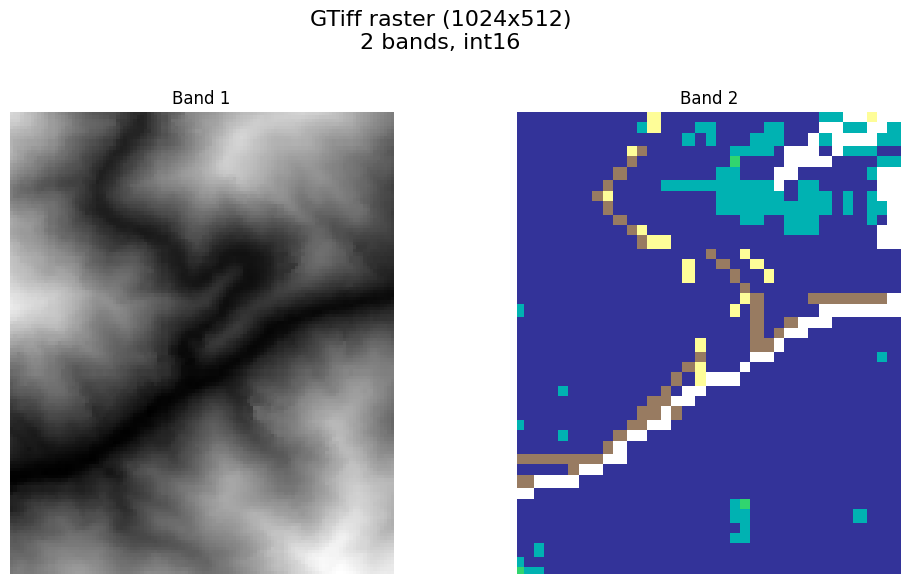

Elevation Map Info
Gray Map Shape: (135, 112)
Min: 757
Max: 1593


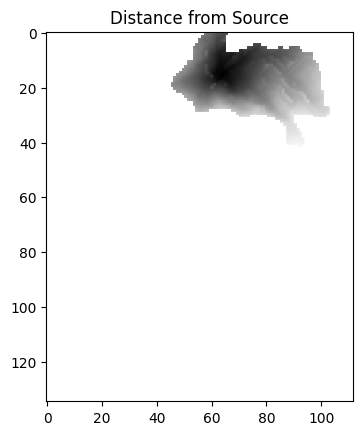

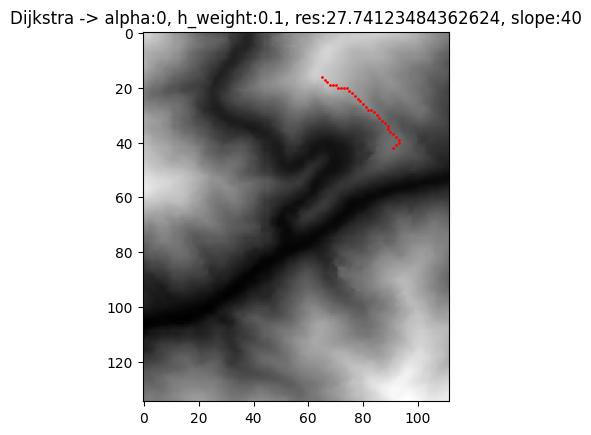

In [9]:
    par_dir = "/Users/aakash/Desktop/MTP2/code"
    tile_size = 512
    SPLIT_DATA = False

    alpha = 0
    h_weight = 0.1
    slope = 40
    resolution = 30 
    # Run main function
    src_lat, src_lon = 31.733824874811024, 77.00073130455512
    des_lat, des_lon = 31.726524680775725, 77.00802691307562
    bounding_box = (76.98328796870653,31.70144173323603, 77.01350037105028,31.737946830245892)
    path = main(bounding_box, (src_lat,src_lon), (des_lat,des_lon), par_dir = par_dir, tile_size=tile_size,SPLIT_DATA=SPLIT_DATA,alpha=alpha,h_weight=h_weight,slope=slope,resolution=resolution, DEBUG=True, SHOW_PLOT=True)


    